In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [27]:
#Create model class that inherits nn.Module

class Model(nn.Module):
    #input layer(4 features of the flower) -->
    #  hidden layer1 (H1) (some neurons)--> 
    # hidden layer2 (H2) --> 
    # output(3 classes of iris flower)
    
    def __init__(self,input_features =4, h1=8,h2=8,output_classes=3):
        super().__init__() #instantiate nn.Model
        self.fc1= nn.Linear(input_features,h1)
        self.fc2= nn.Linear(h1,h2)
        self.output= nn.Linear(h2,output_classes)
    
    def forward(self,x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.output(x)
        return x

    

In [28]:
#pick random seed for reproducibility
torch.manual_seed(0)
model = Model()


In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [30]:
url='https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df=pd.read_csv(url)


In [31]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [32]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [33]:
df['species'] = df['species'].replace({'setosa':0, 'versicolor':1, 'virginica':2})
df.head()

C:\Users\patha\AppData\Local\Temp\ipykernel_29952\2136417223.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['species'] = df['species'].replace({'setosa':0, 'versicolor':1, 'virginica':2})


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [34]:
#train test split
X = df.drop('species', axis=1)
y = df['species']
#change X and y to numpy arrays from df
X=X.values
y=y.values


In [35]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

In [36]:
#convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
#convert y labels to long tensors
y_test = torch.LongTensor(y_test)
y_train = torch.LongTensor(y_train)


In [37]:
#set criteria of model to measure error.. how far off the prediction are from data
criterion = nn.CrossEntropyLoss() 
#choose optimizer we use Adam Optimizer 
#learning rate (if error doesn't go down after bunch of epochs we might want to lower the learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [38]:
model.parameters


<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (output): Linear(in_features=8, out_features=3, bias=True)
)>

In [39]:
#train model
#decide how many epochs we want to train the model
epoch=100
losses=[]
for i in range(epoch):
    #forward pass and get predictions
    y_pred = model.forward(X_train)
    #measure loss
    loss = criterion(y_pred, y_train) #it calculates the error between predicted and actual labels
    #keep track of losses
    losses.append(loss.detach().numpy())
    #print loss every 10 epochs
    if i % 10 == 0:
        print(f'Epoch {i} Loss: {loss}')
    #do backpropagation: take error of forward pass and feed it back to model to fine tune the weights
    optimizer.zero_grad() #clear previous gradients
    loss.backward() #calculate gradients
    optimizer.step() #update weights based on gradients

Epoch 0 Loss: 1.1142258644104004
Epoch 10 Loss: 0.9515107870101929
Epoch 20 Loss: 0.7233545184135437
Epoch 30 Loss: 0.5135570168495178
Epoch 40 Loss: 0.4098794162273407
Epoch 50 Loss: 0.34537169337272644
Epoch 60 Loss: 0.27380821108818054
Epoch 70 Loss: 0.19395692646503448
Epoch 80 Loss: 0.13566477596759796
Epoch 90 Loss: 0.10168477892875671


Text(0, 0.5, 'Loss')

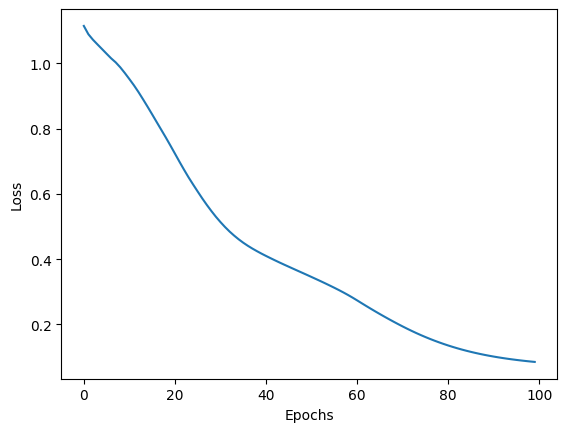

In [40]:
#graph
plt.plot(range(epoch), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [ ]:
#evaluate model
with torch.no_grad():#turn of back propagation
    y_eval = model.forward(X_test)
    loss= criterion(y_eval, y_test)
    print(f'Test Loss: {loss}')#find loss on test set
    


In [ ]:
correct =0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val=model.forward(data)
        #tells what model predicts
        # if y_test[i] == 0:
        #     x = 'setosa'
        # elif y_test[i] == 1:
        #     x = 'versicolor'
        # else:
        #     x = 'virginica'

        print(f"{i+1}. {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}")
        #check if prediction is correct
        if y_val.argmax().iten( )== y_test[i]:
            correct += 1
        print(f'Correct Predictions: {correct}/{len(X_test)}')
